In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:90%;}
div.CodeMirror {font-family:Consolas; font-size:18pt;}
div.output {font-size:19pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:19pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
span.toc-item-num{display:none;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
div.CodeMirror-lines > div {padding-left:10px;}
table.dataframe{font-size:18px;}
</style>
"""))

<b><font size="6" color="red">ch13. 데이터 시각화</font></b>

# 1절. 시각화 개요
- 시각화 라이브러리 : matplotlib, seaborn, folium(지도시각화)
- matplotlib : 파이썬에서 가장 많이 사용하는 시각화 라이브러리. 판다스 내부에 포함
- seaborn : matplotlib 기반으로 다양한 색, 테마, 차트 기능과 groupby 기능을 추가한 라이브러리

# 2절. matplotlib
- https://pypi.org/project/matplotlib/
- https://matplotlib.org/stable/api/index.html : api reference

## 2.1 패키지 import 및 기본 설정

In [2]:
import matplotlib
matplotlib.__version__

'3.7.0'

In [3]:
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
# 한글설정
# warning 감추기

## 2.2 그래프 그리기
- matplotlib으로 그래프를 그리기 위한 단계
    1) 데이터 준비<br>
    2) 그래프 생성 <br>
    3) 그래프 함수로 그리기 <br>
    4) 그래프 커스터마이징 <br>
    5) 그래프 출력 및 저장<br>

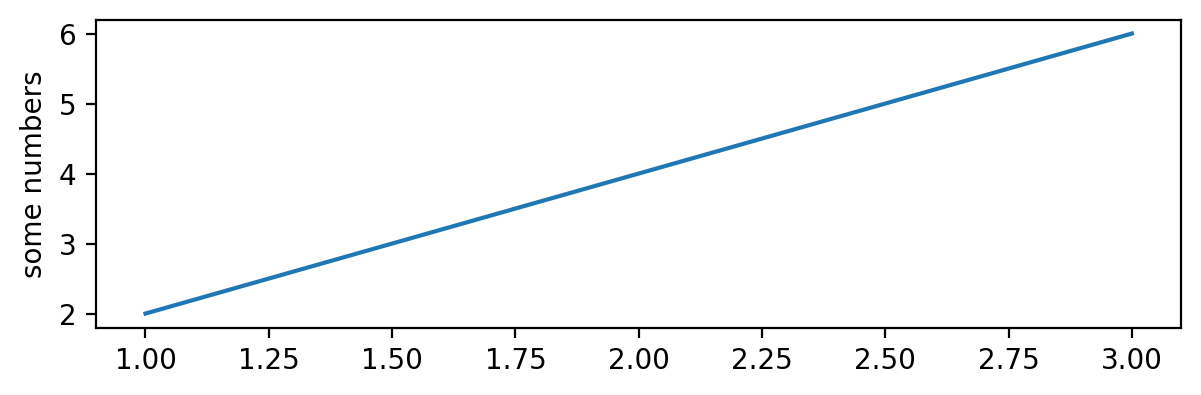

In [11]:
plt.figure(figsize=(7,2)) # 2) 그래프 객체 생성. 사이즈는 인치
plt.plot([1, 2, 3], [2, 4, 6]) # 3) 그래프 함수
plt.ylabel('some numbers')  # 4) 그래프 커스터마이징
plt.show() # 5)그래프 출력

## 2.3 그래프 영역 나누기
### 1) subplot()함수로 서브플롯 추가

In [13]:
import numpy as np
x = np.arange(0, 10, 0.01)
x.shape

(1000,)